In [273]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [274]:
filename="img3.jpg"

In [275]:
img = cv2.imread(filename,0)

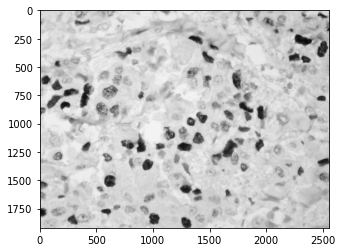

In [276]:
plt.imshow(img,cmap="gray")

In [277]:
equ = cv2.equalizeHist(img)

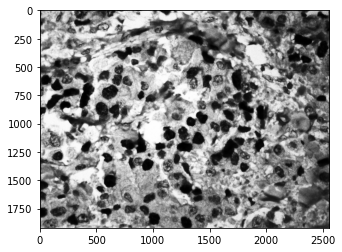

In [278]:

plt.imshow(equ,cmap="gray")

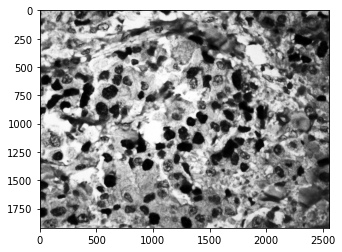

In [279]:
Gaussian = cv2.GaussianBlur(equ, (5, 5), 0)
plt.imshow(Gaussian,cmap="gray")
# cv2.imshow('Gaussian Blurring', Gaussian)
# cv2.waitKey(0)
# cv.destroyAllWindows()

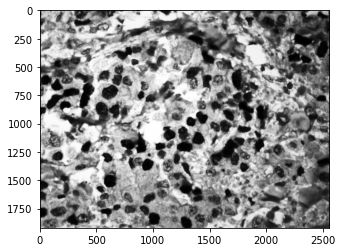

In [280]:
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(Gaussian, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing,cmap="gray")

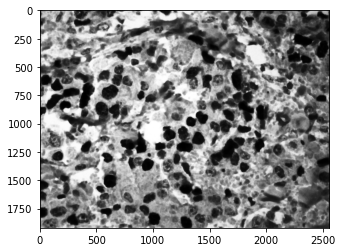

In [281]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(closing,kernel,iterations = 1)
plt.imshow(erosion,cmap="gray")


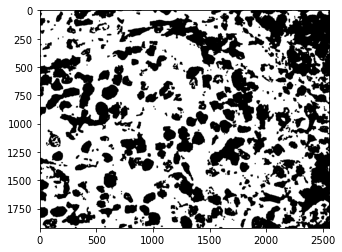

In [282]:
# edged = cv2.Canny(erosion, 30, 200)
# plt.imshow(edged)
# ret, thresh = cv.threshold(edged, 127, 255, 0)

ret, thresh = cv2.threshold(erosion, 100, 255,0)
plt.imshow(thresh,cmap="gray")
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

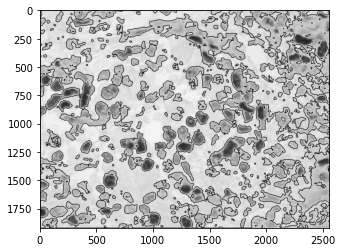

In [283]:
cv2.drawContours(img,contours, -1, (0, 255, 0), 3)
plt.imshow(img,cmap="gray")
# cv2.imshow('Contours', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [284]:
print("Number of Contours found = " + str(len(contours)))

Number of Contours found = 560


In [285]:
tot = (len(contours))

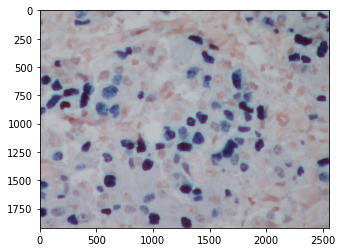

In [286]:
img = cv2.imread(filename)
Gaussian = cv2.GaussianBlur(img, (9,9), 0)
#plt.imshow(Gaussian,cmap="gray")

kernel = np.ones((7,7),np.uint8)
closing = cv2.morphologyEx(Gaussian, cv2.MORPH_CLOSE, kernel)
#plt.imshow(closing,cmap="gray")

kernel = np.ones((7,7),np.uint8)
erosion = cv2.erode(closing,kernel,iterations = 1)
plt.imshow(erosion)

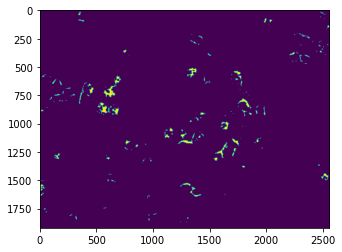

Number of Contours found = 303


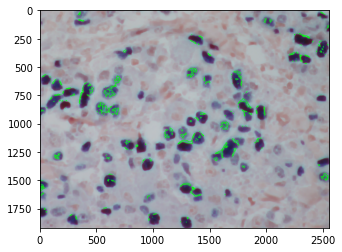

In [287]:
#img = cv2.imread("img1.jpg")
img = erosion
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv,(10, 85, 20), (25, 240, 255) )
plt.imshow(mask)
plt.show()
##cv2.imshow("orange", mask);cv2.waitKey();cv2.destroyAllWindows()
#plt.imshow(mask,cmap="gray")
ret, thresh = cv2.threshold(mask, 100, 255,0)
plt.imshow(thresh,cmap="gray")
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img,contours, -1, (0, 255, 0), 3)
plt.imshow(img,cmap="gray")
#plt.show()
print("Number of Contours found = " + str(len(contours)))

In [288]:
brown = len(contours)

In [289]:
percent = brown/tot*100
print("Percentage of positivity = ",percent,"%")

Percentage of positivity =  54.107142857142854 %


In [290]:
if(percent>15):
    print("High grade")
else:
    print("Low grade")

High grade
